In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading data from csv with pandas read_csv function

In [153]:
colnames = ['Survival','still-alive','age-at-heart-attack','pericardial-effusion','fractional-shortening','epss','lvdd','wall-motion-score','wall-motion-index','mult','name','group','alive-at-1']
data = pd.read_csv('echocardiogram.csv',delimiter=',',names=colnames,header=None)

In [154]:
data.head()

,Survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0


In [155]:
data.describe()

,Survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1
count,132,132,132,132,132,132,132,132,132,132,132,132,132
unique,57,3,39,3,73,92,106,47,66,31,1,3,3
top,0.5,0,62,0,?,?,?,14,1,0.857,name,2,?
freq,6,88,10,107,8,15,11,21,42,29,132,86,58


In [156]:
data.shape

(132, 13)

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
Survival                 132 non-null object
still-alive              132 non-null object
age-at-heart-attack      132 non-null object
pericardial-effusion     132 non-null object
fractional-shortening    132 non-null object
epss                     132 non-null object
lvdd                     132 non-null object
wall-motion-score        132 non-null object
wall-motion-index        132 non-null object
mult                     132 non-null object
name                     132 non-null object
group                    132 non-null object
alive-at-1               132 non-null object
dtypes: object(13)
memory usage: 13.5+ KB


Cleaning Data 

In [158]:
#Removing un related data
data = data.drop(['mult'],axis=1)
data = data.drop(['name'],axis=1)
data = data.drop(['group'],axis=1)

In [160]:
data = data.drop(['Survival'],axis=1)
data = data.drop(['still-alive'],axis=1)

In [161]:
data.head()

,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,alive-at-1
0,71,0,0.260,9,4.600,14,1,0
1,72,0,0.380,6,4.100,14,1.700,0
2,55,0,0.260,4,3.420,14,1,0
3,60,0,0.253,12.062,4.603,16,1.450,0
4,57,0,0.160,22,5.750,18,2.250,0


Plotting the distribution of target variable

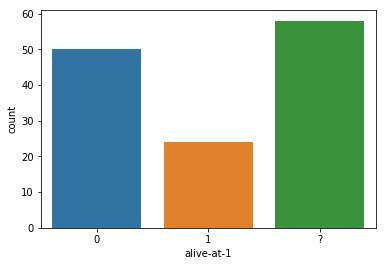

In [162]:
sns.countplot(data['alive-at-1'])

In [163]:
data.shape

(132, 8)

In [171]:
#Dropping ?
data = data[data != '?']
data = data.dropna()
data.shape

(62, 8)

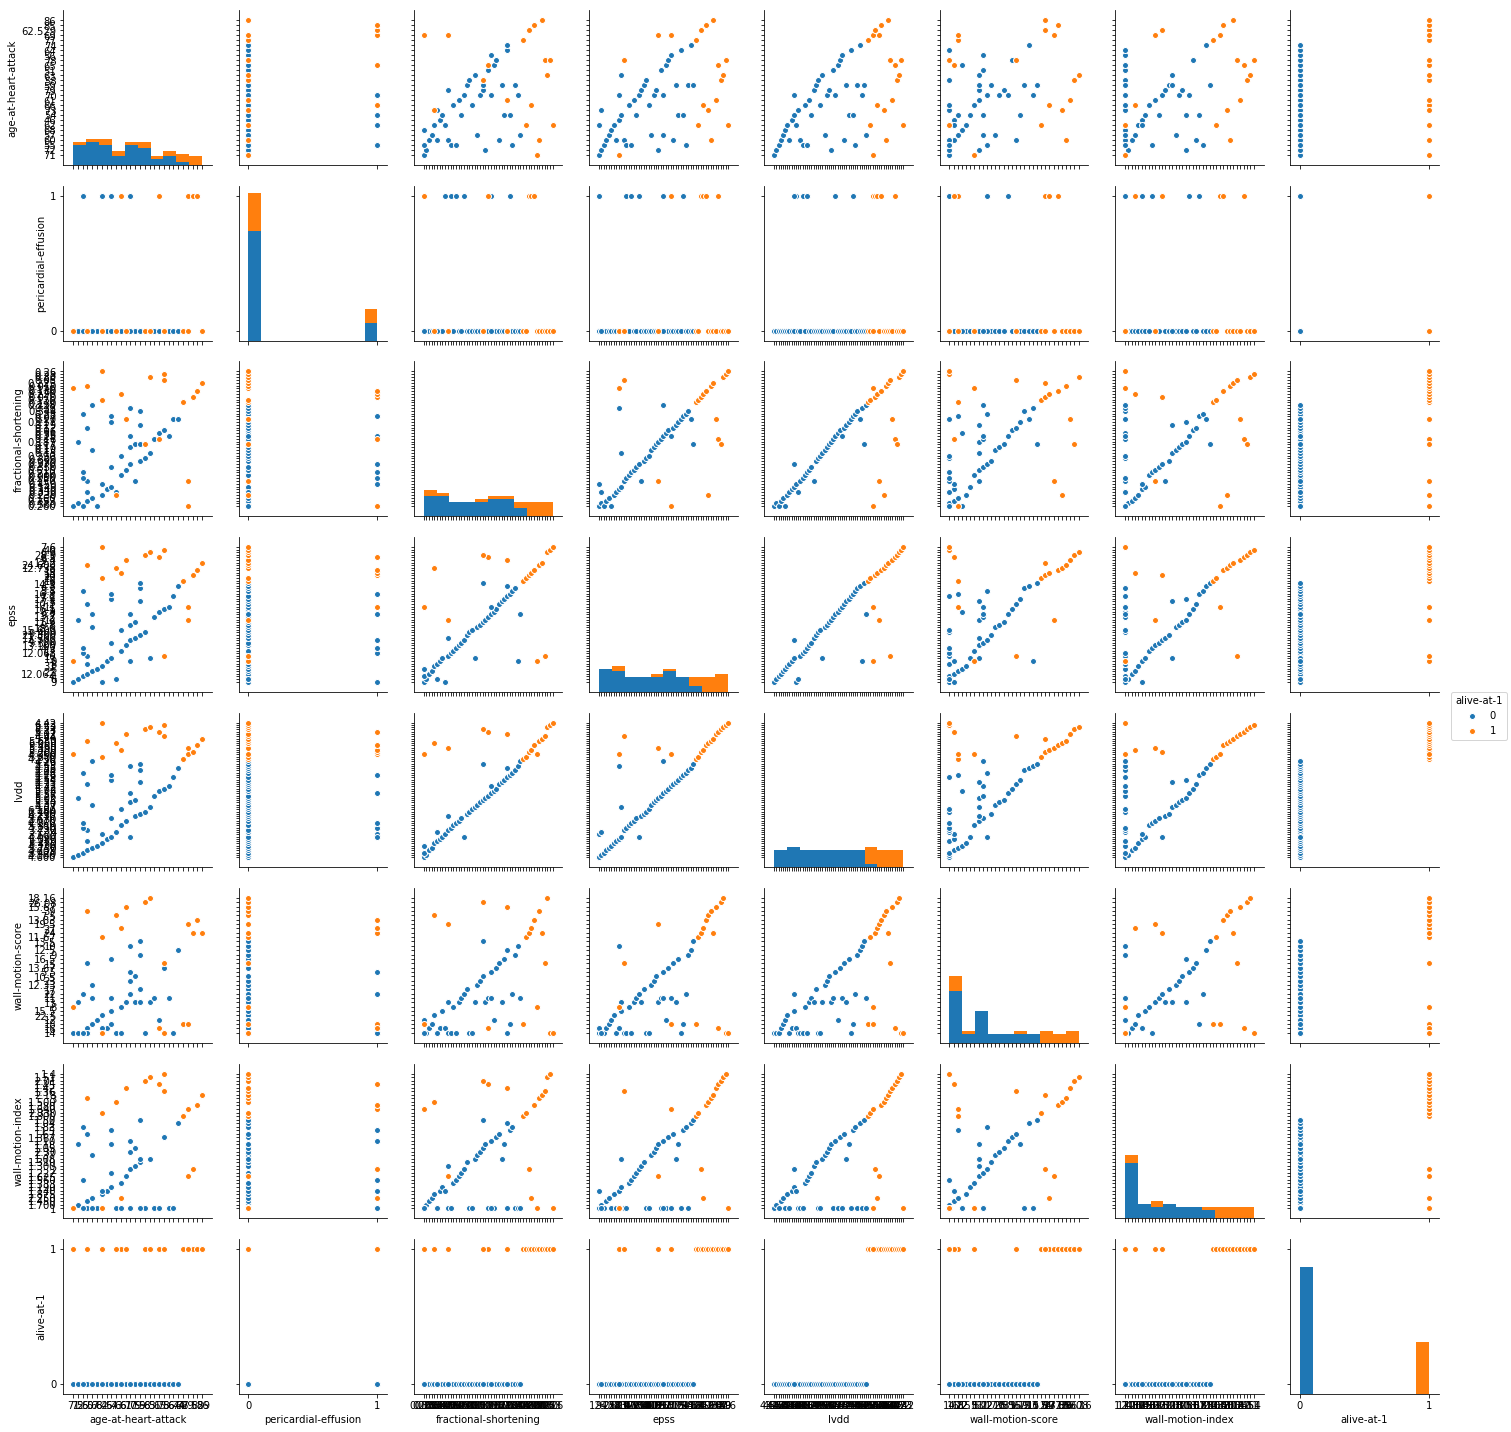

In [174]:
sns.pairplot(data, hue='alive-at-1')

Classification using KNN

In [175]:
from sklearn import neighbors

In [176]:
x = data.values[:,:-1]
y = data.values[:,-1]

In [182]:
n_neighbors = 5
clf = neighbors.KNeighborsClassifier(n_neighbors)

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)
y_predicted

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0'], dtype=object)

Evaluating metrics

In [185]:
from sklearn.metrics import classification_report

In [186]:
print(classification_report(y_test,y_predicted))

             precision    recall  f1-score   support

          0       0.79      1.00      0.88        15
          1       0.00      0.00      0.00         4

avg / total       0.62      0.79      0.70        19



/Users/divyasankar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
